# K-Means (Titanic)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
train1=pd.read_csv(r'C:\Users\Nelson\Documents\Sync\Proj_Titanic\Datas\train2.csv',sep=',')
trainP=train1.drop(['Unnamed: 0'],axis=1)
trainP
trainA=trainP.copy()
trainA

,Pclass,SibSp,Parch,Fare,Sex Encode,Embarked-2,Age-sep
0,3,1,0,130.982998,1,2,1
1,1,1,0,712.833000,0,0,3
2,3,0,0,7.925000,0,2,2
3,1,1,0,130.982998,0,2,3
4,3,0,0,130.982998,1,2,3
...,...,...,...,...,...,...,...
886,2,0,0,13.000000,1,2,2
887,1,0,0,30.000000,0,2,1
888,3,1,2,130.982998,0,2,2
889,1,0,0,30.000000,1,0,2


In [3]:
trainP.describe()
#El Fare su mean está alto se podría normalizar para que todos queden entre 0 y 1

,Pclass,SibSp,Parch,Fare,Sex Encode,Embarked-2,Age-sep
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.381594,130.982998,0.647587,1.538721,2.086420
std,0.836071,1.102743,0.806057,148.628352,0.477990,0.794231,1.151621
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,39.000000,0.000000,1.000000,1.000000
50%,3.000000,0.000000,0.000000,130.982998,1.000000,2.000000,2.000000
75%,3.000000,1.000000,0.000000,130.982998,1.000000,2.000000,3.000000
max,3.000000,8.000000,6.000000,910.792000,1.000000,3.000000,6.000000


In [4]:
#trainA 

In [3]:
#Normalizo los datos 
"""from sklearn.preprocessing import MinMaxScaler
normalizador1=MinMaxScaler()
trainA=pd.DataFrame(normalizador1.fit_transform(trainA), columns=['Pclass','SibSp','Parch','Fare','Sex Encode','Embarked-2','Age-sep'])
trainA.describe()"""

"from sklearn.preprocessing import MinMaxScaler\nnormalizador1=MinMaxScaler()\ntrainA=pd.DataFrame(normalizador1.fit_transform(trainA), columns=['Pclass','SibSp','Parch','Fare','Sex Encode','Embarked-2','Age-sep'])\ntrainA.describe()"

In [18]:
#Normalizo con z_score
from sklearn.preprocessing import StandardScaler
normalizador2=StandardScaler()
trainB=normalizador2.fit_transform(trainA)
trainB=pd.DataFrame(trainB, columns=['Pclass','SibSp','Parch','Fare','Sex Encode','Embarked-2','Age-sep'])
#trainB.describe()
trainB

,Pclass,SibSp,Parch,Fare,Sex Encode,Embarked-2,Age-sep
0,0.827377,0.432793,-0.473674,0.000000,0.737695,0.581114,-0.943913
1,-1.566107,0.432793,-0.473674,3.916997,-1.355574,-1.938460,0.793745
2,0.827377,-0.474545,-0.473674,-0.828423,-1.355574,0.581114,-0.075084
3,-1.566107,0.432793,-0.473674,0.000000,-1.355574,0.581114,0.793745
4,0.827377,-0.474545,-0.473674,0.000000,0.737695,0.581114,0.793745
...,...,...,...,...,...,...,...
886,-0.369365,-0.474545,-0.473674,-0.794258,0.737695,0.581114,-0.075084
887,-1.566107,-0.474545,-0.473674,-0.679815,-1.355574,0.581114,-0.943913
888,0.827377,0.432793,2.008933,0.000000,-1.355574,0.581114,-0.075084
889,-1.566107,-0.474545,-0.473674,-0.679815,0.737695,-1.938460,-0.075084


In [19]:
#Separo 4 filas
test1=pd.DataFrame(trainB.loc[[20,120,530,640]],columns=['Pclass','SibSp','Parch','Fare','Sex Encode','Embarked-2','Age-sep'])
test1=test1.reset_index(drop=True)
test1

,Pclass,SibSp,Parch,Fare,Sex Encode,Embarked-2,Age-sep
0,-0.369365,-0.474545,-0.473674,-0.706742,0.737695,0.581114,0.793745
1,-0.369365,1.340132,-0.473674,0.000000,0.737695,0.581114,-0.943913
2,-0.369365,0.432793,0.767630,-0.706742,-1.355574,0.581114,-1.812742
3,0.827377,-0.474545,-0.473674,-0.353031,0.737695,0.581114,-0.943913


In [20]:
#Le saco las 4 filas al conjunto inicial me queda trainC para entrenar
trainC=trainB.drop([20,120,530,640],axis=0)
trainC

,Pclass,SibSp,Parch,Fare,Sex Encode,Embarked-2,Age-sep
0,0.827377,0.432793,-0.473674,0.000000,0.737695,0.581114,-0.943913
1,-1.566107,0.432793,-0.473674,3.916997,-1.355574,-1.938460,0.793745
2,0.827377,-0.474545,-0.473674,-0.828423,-1.355574,0.581114,-0.075084
3,-1.566107,0.432793,-0.473674,0.000000,-1.355574,0.581114,0.793745
4,0.827377,-0.474545,-0.473674,0.000000,0.737695,0.581114,0.793745
...,...,...,...,...,...,...,...
886,-0.369365,-0.474545,-0.473674,-0.794258,0.737695,0.581114,-0.075084
887,-1.566107,-0.474545,-0.473674,-0.679815,-1.355574,0.581114,-0.943913
888,0.827377,0.432793,2.008933,0.000000,-1.355574,0.581114,-0.075084
889,-1.566107,-0.474545,-0.473674,-0.679815,0.737695,-1.938460,-0.075084


In [21]:
#Busco los mejores k con Wscc
from sklearn.cluster import KMeans
scd = []
for i in range(1, 12):
    clasificador1 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    clasificador1.fit(trainC)
    scd.append(clasificador1.inertia_)# atributo que me da Sum of squared distances of samples to their closest cluster center.

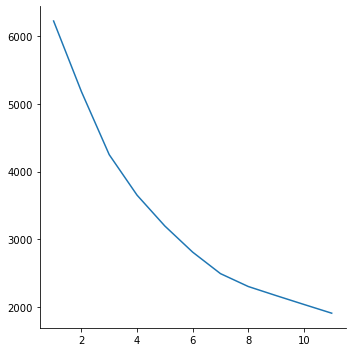

In [22]:
sns.relplot(x=range(1,12),y=scd,kind='line')#Parece entre 4 y 5

In [39]:
#Library Knedd calcula donde decrece drasticamente la curva
from kneed import DataGenerator, KneeLocator
kl = KneeLocator(range(1, 12), scd, curve="convex", direction="decreasing")
kl.elbow


5

In [23]:
#Uso silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silh = []
for i in range(2, 12):
    clasificador2 = KMeans(n_clusters = i, init = 'k-means++', n_init=20, random_state = 42)
    clasificador2.fit(trainC)
    etiquetas=clasificador2.labels_
    silhProm=silhouette_score(trainC, etiquetas)
    silh.append(silhProm)

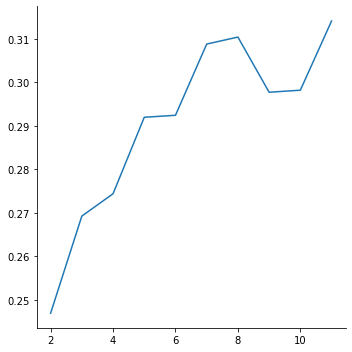

In [24]:
sns.relplot(x=range(2,12),y=silh,kind='line')

In [25]:
#Uso calinski_harabasz
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
chs = []
for i in range(2, 12):
    clasificador3 = KMeans(n_clusters = i, init = 'k-means++', n_init=20, random_state = 42)
    clasificador3.fit(trainC)
    etiquetas=clasificador3.labels_
    chsProm=calinski_harabasz_score(trainC, etiquetas)
    chs.append(chsProm)

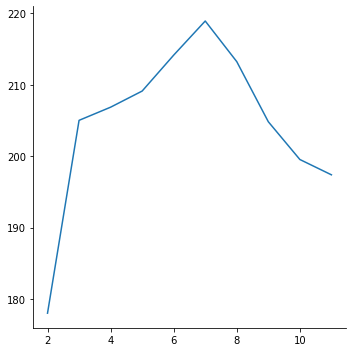

In [26]:
sns.relplot(x=range(2,12),y=chs,kind='line')

In [27]:
#Uso davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
dbs = []
for i in range(2, 12):
    clasificador4 = KMeans(n_clusters = i, init = 'k-means++', n_init=20, random_state = 42)
    clasificador4.fit(trainC)
    etiquetas=clasificador4.labels_
    dbsProm=davies_bouldin_score(trainC, etiquetas)
    dbs.append(dbsProm)

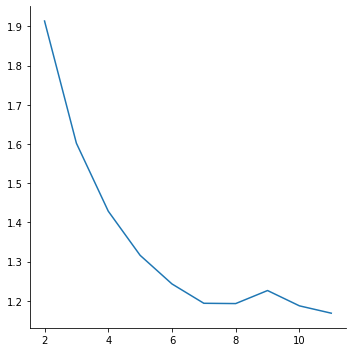

In [28]:
sns.relplot(x=range(2,12),y=dbs,kind='line')

In [60]:
#Usando distorsion para el k
from scipy.spatial.distance import cdist 
distor= []
for i in range(2, 12):
    clasificador5 = KMeans(n_clusters = i, init = 'k-means++', n_init=20, random_state = 42)
    clasificador5.fit(trainC)
    distor.append(sum(np.min(cdist(trainC, clasificador5.cluster_centers_, 
                      'euclidean'),axis=1)) / trainC.shape[0])

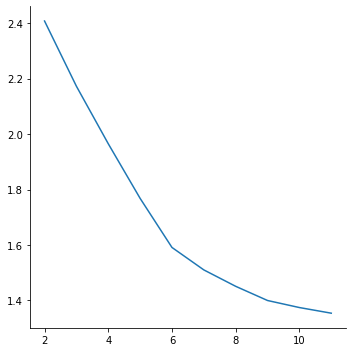

In [61]:
sns.relplot(x=range(2,12),y=distor,kind='line')

In [ ]:
"""from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(cluster_df)
        score.append((cov,n_comp,gmm.bic(cluster_df)))
score"""

In [ ]:
#Según todas lasgráficas el k mejor es k=7 podría ser 8 también 

In [52]:
clasificadorF1 = KMeans(n_clusters = 7, init = 'k-means++', n_init=20, random_state = 42)
clasificadorF1.fit(trainC)
etiquetas1=clasificadorF1.labels_


In [61]:
pred =  clasificadorF1.predict(trainC)
frame = pd.DataFrame(trainC)
frame['cluster'] = pred
frame['cluster'].value_counts()
centroides=clasificadorF1.cluster_centers_
print(centroides)


[[ 5.92367469e-01 -2.88143316e-01 -3.83669731e-01 -2.26977298e-01
   7.37695132e-01  4.55515827e-01 -2.06327009e-01  3.99680289e-15]
 [ 3.18550487e-02 -1.12658718e-01 -2.15367681e-01 -3.17341996e-01
  -1.35557354e+00  3.40807722e-01 -1.25305299e-01  3.00000000e+00]
 [-2.85218913e-01 -1.62647566e-01 -1.82743104e-01 -2.13240325e-02
  -4.72806195e-02 -1.93846038e+00 -3.43576232e-02  4.00000000e+00]
 [ 7.70389526e-01  3.60847833e+00  1.53605585e+00  1.83708263e-01
  -1.09580282e-01  4.61134213e-01 -1.23352247e+00  2.00000000e+00]
 [-1.22418062e-01  1.59151577e-01  2.63943673e+00  7.74936074e-03
  -8.57176236e-01  1.41188268e-01 -2.68157059e-01  6.00000000e+00]
 [-1.56610693e+00  3.72868130e-02 -5.99057800e-02  3.80149182e+00
  -3.89449537e-01 -1.09860227e+00  7.04634242e-01  5.00000000e+00]
 [-1.15641144e+00 -2.53841222e-01 -3.61844466e-01 -1.97626077e-01
   6.24545474e-01  4.56270170e-01  1.24772755e+00  1.00000000e+00]]


In [55]:
print(davies_bouldin_score(trainC, etiquetas1))
print(calinski_harabasz_score(trainC, etiquetas1))
print(silhouette_score(trainC, etiquetas1))
clasificadorF1.n_iter_

1.3538086693488491
229.43722223386249
0.3568695994841527


10

In [31]:
clasificadorF2 = KMeans(n_clusters = 8, init = 'k-means++', n_init=20, random_state = 42)
clasificadorF2.fit(trainC)
etiquetas2=clasificadorF2.labels_

In [32]:
print(davies_bouldin_score(trainC, etiquetas2))
print(calinski_harabasz_score(trainC, etiquetas2))
print(silhouette_score(trainC, etiquetas2))

1.1930781158503543
213.2331120328395
0.31043433928714653


In [33]:
#Este sería con un k malo
clasificadorF3 = KMeans(n_clusters = 12, init = 'k-means++', n_init=20, random_state = 42)
clasificadorF3.fit(trainC)
etiquetas3=clasificadorF3.labels_

In [34]:
#Da resultados peores
print(davies_bouldin_score(trainC, etiquetas3))
print(calinski_harabasz_score(trainC, etiquetas3))
print(silhouette_score(trainC, etiquetas3))

1.191818478175921
191.61683192866005
0.3140288753770199


In [56]:
#Llevo a dos dimensiones para visualizar algo uso PCA
from sklearn.decomposition import PCA
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(trainC)
pca = modelo_pca.transform(trainC) 
centroides_pca=modelo_pca.transform(centroides) 

In [ ]:
*

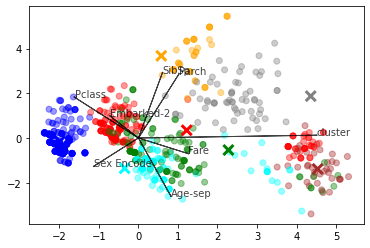

In [59]:
# Defino los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown','cyan',]
 
colores_cluster = [colores[etiquetas1[i]] for i in range(len(pca))]

plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = trainC.columns

for i in range(len(columnas)):
    
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)
plt.show()